In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('/Users/anuradhamadurapperuma/Documents/MyProjects/movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Get the shape of the dataset
df.shape

(7668, 15)

In [5]:
# Get summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Get the numerical summary of the dataset
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [7]:
# Get the description of categorical columns

df.describe(include='object')

,name,rating,genre,released,director,writer,star,country,company
count,7668,7591,7668,7666,7668,7665,7667,7665,7651
unique,7512,12,19,3414,2949,4535,2814,59,2385
top,Nobody's Fool,R,Comedy,"February 14, 1986 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,3697,2245,9,38,37,43,5475,377


In [8]:
# check for data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# check for missing data

for col in df.columns:
    pct_miss = np.mean(df[col].isnull())
    print('{}, {}%'.format(col, round(pct_miss*100)))

name, 0%
rating, 1%
genre, 0%
year, 0%
released, 0%
score, 0%
votes, 0%
director, 0%
writer, 0%
star, 0%
country, 0%
budget, 28%
gross, 2%
company, 0%
runtime, 0%


In [10]:
# Check the number of null values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

### Data cleaning 

In [11]:
# Fill the empty cells of columns (votes, gross, runtime, rating)
# votes,gross, runtime will filled with mean values
a = df['votes'].mean()
b = df['gross'].mean()
c = df['runtime'].mean()

# rating column will be filled with a random value
d = np.random.choice(["R", "PG", "NC-17", "PG-13", "Not Rated"])

df['votes'].fillna(a, inplace = True)
df['gross'].fillna(b, inplace = True)
df['runtime'].fillna(c, inplace =True)
df['rating'].fillna(d, inplace = True)

In [12]:
# Fill the budget column with random values
existing_budget_values = df.dropna(subset=['budget'])['budget']
df['budget'] = df['budget'].apply(lambda x: np.random.choice(existing_budget_values) if pd.isnull(x) else x)

In [13]:
# delete the rows that can not be filled
df = df.dropna()

In [14]:
# check the duplicated rows
df.duplicated().sum()

0

In [15]:
# delete the duplicated rows of the dataset
df = df.drop_duplicates()

In [16]:
# check the cleaned dataset

df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [17]:
# change the data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [18]:
# Extract release date, release year, and release country
df[['release_date', 'release_year', 'release_country']] = df['released'].str.extract(r'^(.*?) (\d{4}) \((.*?)\)$')


In [19]:
# view the dataset to see the highest to lowest gross

df = df.sort_values('gross', ascending = False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year,release_country
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,"December 18,",2009,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,"April 26,",2019,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,"December 19,",1997,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,"December 18,",2015,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,"April 27,",2018,United States


In [20]:
#  Check the number of companies in the dataset
df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2379, dtype: object

In [21]:
# Organise the dataset with highest to lowest gross values
df = df.sort_values('gross', ascending = False)
df = df.reset_index(drop=True)

### Correlation

In [22]:
# Get the correlation between all numeric value
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097922,0.223123,0.236027,0.252334,0.119750
score,0.097922,1.000000,0.409468,0.059050,0.182881,0.399922
votes,0.223123,0.409468,1.000000,0.353164,0.628735,0.308901
budget,0.236027,0.059050,0.353164,1.000000,0.598141,0.221801
gross,0.252334,0.182881,0.628735,0.598141,1.000000,0.241296
runtime,0.119750,0.399922,0.308901,0.221801,0.241296,1.000000


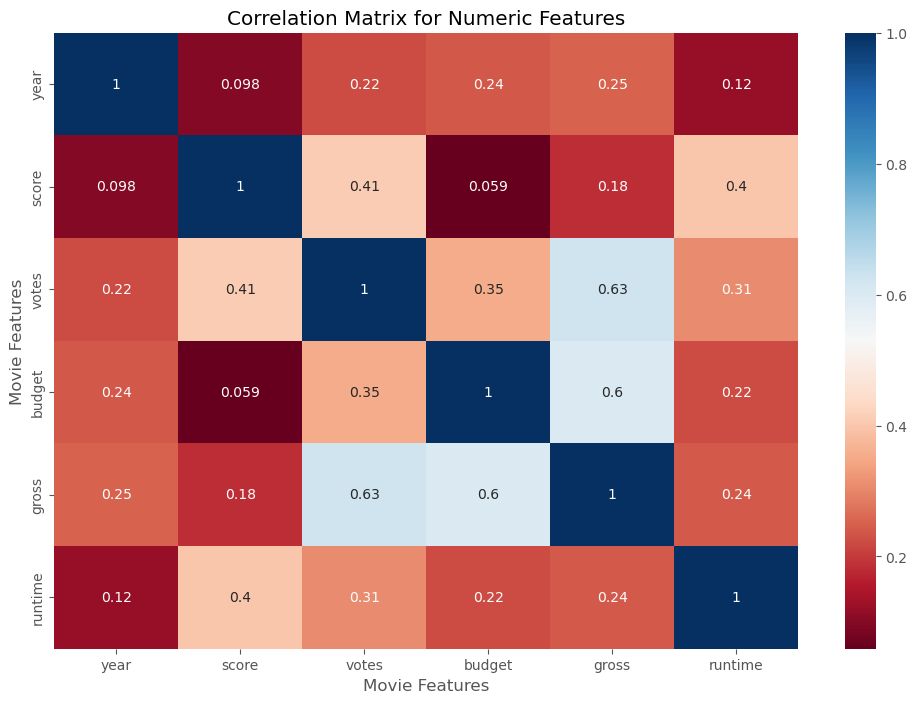

In [23]:
# Visalise the correlation of features

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu')

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

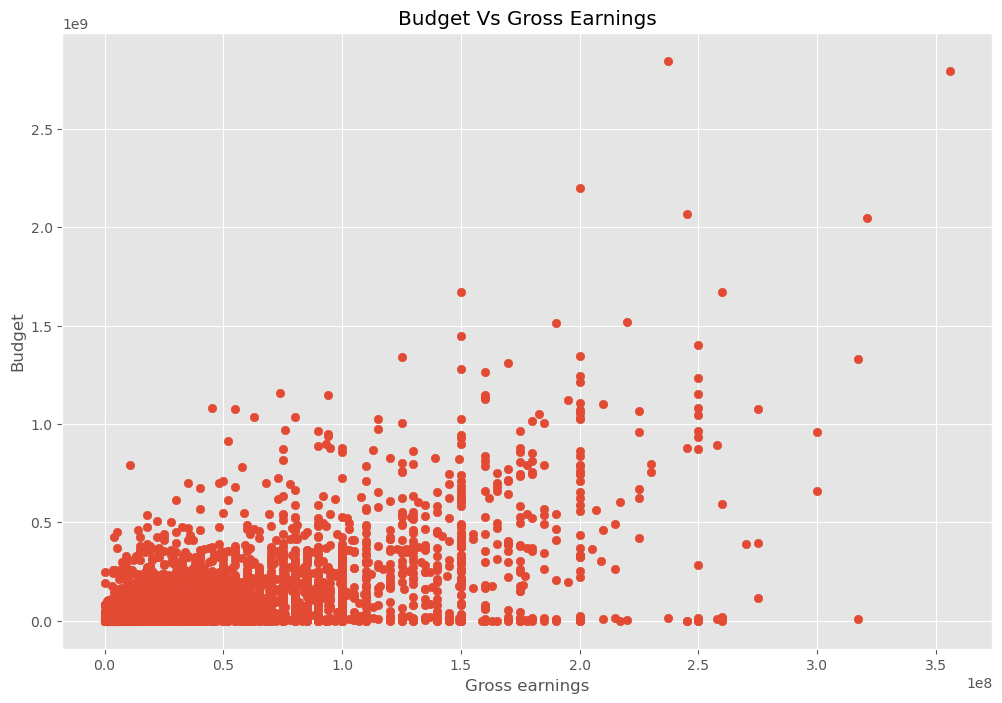

In [24]:
# Scatter plot for plotting the high correlated features (Groos vs Budget)
plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget Vs Gross Earnings")
plt.xlabel("Gross earnings")
plt.ylabel("Budget")
plt.show()

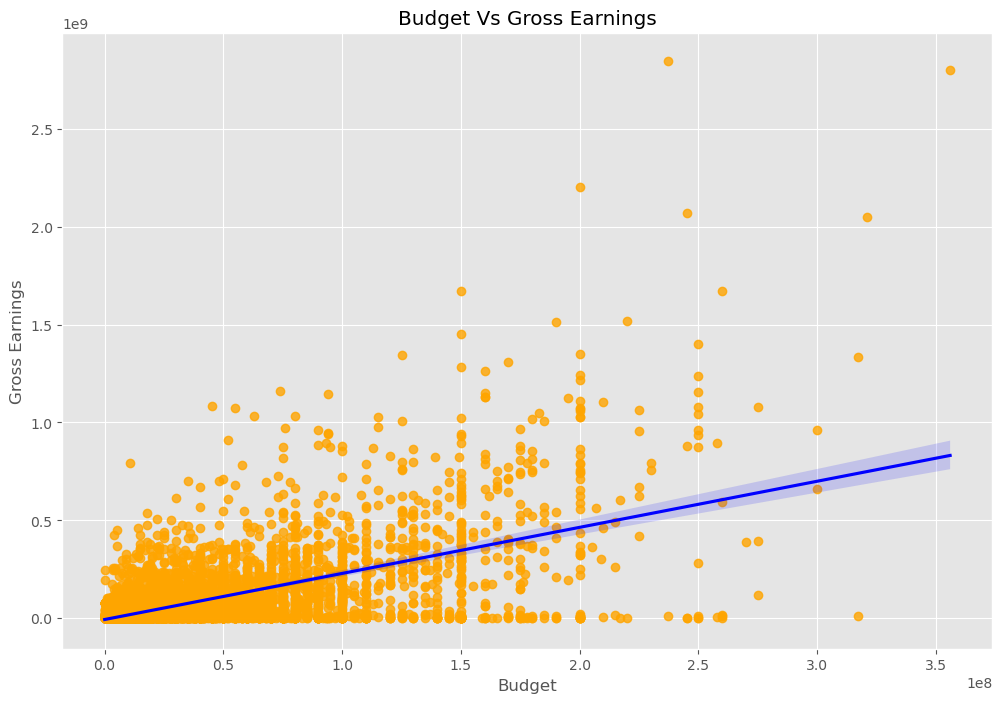

In [25]:
# Plot the Bodget Vs Gross using seaborn

sns.regplot(x='budget' , y='gross' , data=df, scatter_kws={'color':'Orange'}, line_kws={'color':'blue'})
plt.title("Budget Vs Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.show()

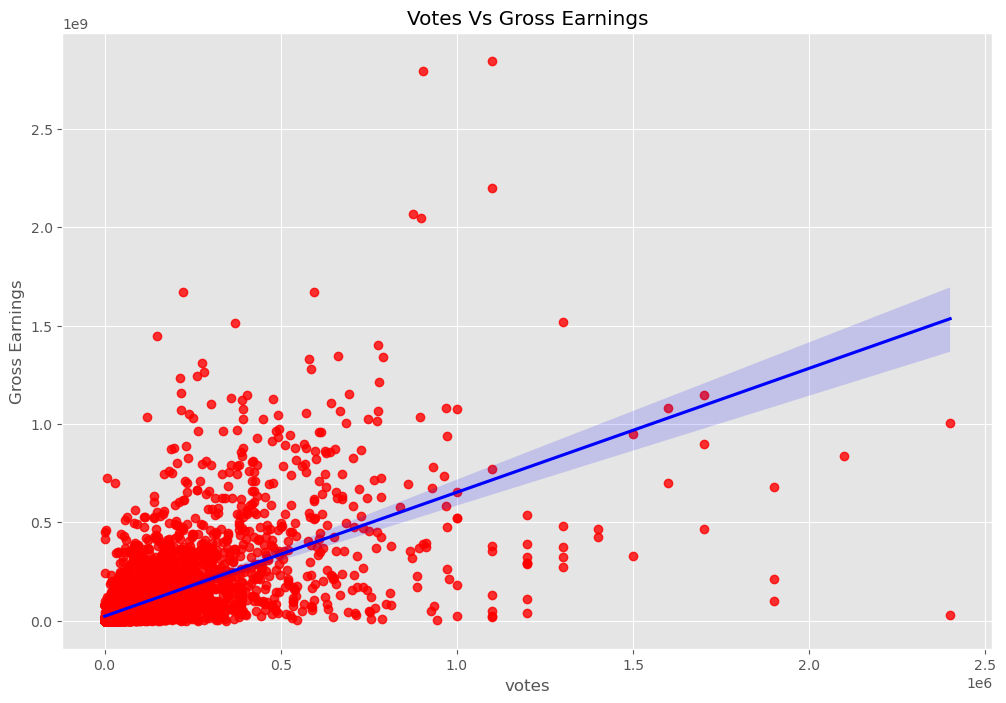

In [26]:
# Plot the Votes Vs Gross using seaborn

sns.regplot(x='votes' , y='gross' , data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title("Votes Vs Gross Earnings")
plt.xlabel("votes")
plt.ylabel("Gross Earnings")
plt.show()

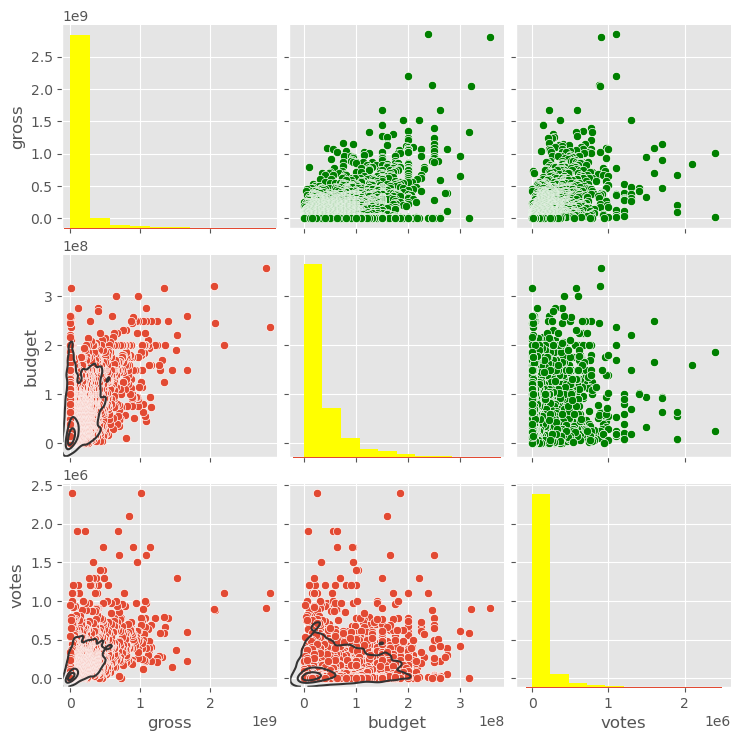

In [27]:
# Get the correlaion between three features 

#import warnings

corr_df = pd.DataFrame(df, columns=['gross', 'budget', 'votes'])
#warnings.filterwarnings("ignore")

pair_plot = sns.pairplot(corr_df, diag_kind="kde")

pair_plot.map_upper(sns.scatterplot, color='green')
pair_plot.map_lower(sns.kdeplot, levels=4, color=".2")
pair_plot.map_diag(plt.hist, color="yellow")


plt.show()
#warnings.filterwarnings("default")


### Data Visualisation

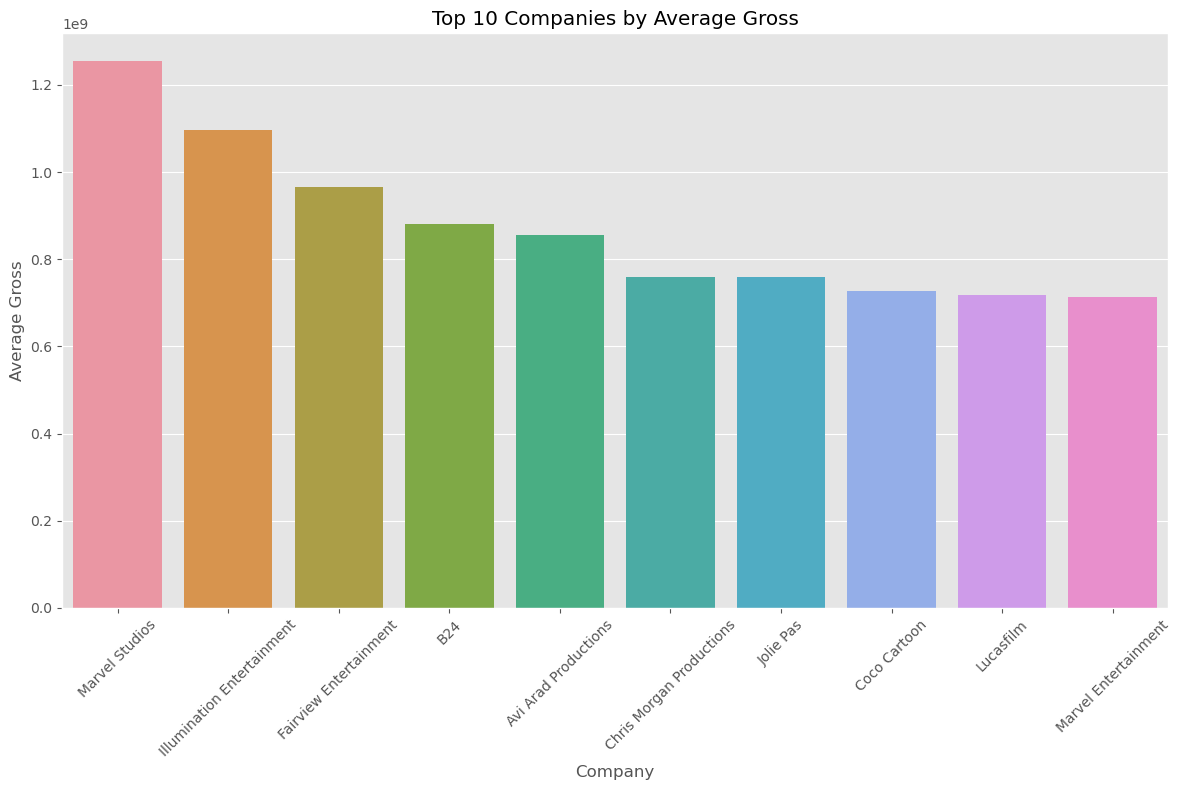

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by company and calculate the average gross
avg_company = df.groupby('company').gross.mean().reset_index()

# Sort the companies by average gross in descending order
highest_avg_company = avg_company.sort_values('gross', ascending=False)

# Select the top 10 companies
top_10_avg_company = highest_avg_company.head(10)

# Create a bar plot for the top 10 companies
ax = sns.barplot(data=top_10_avg_company, x='company', y='gross')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Company')
plt.ylabel('Average Gross')
plt.title('Top 10 Companies by Average Gross')
plt.tight_layout()
plt.show()


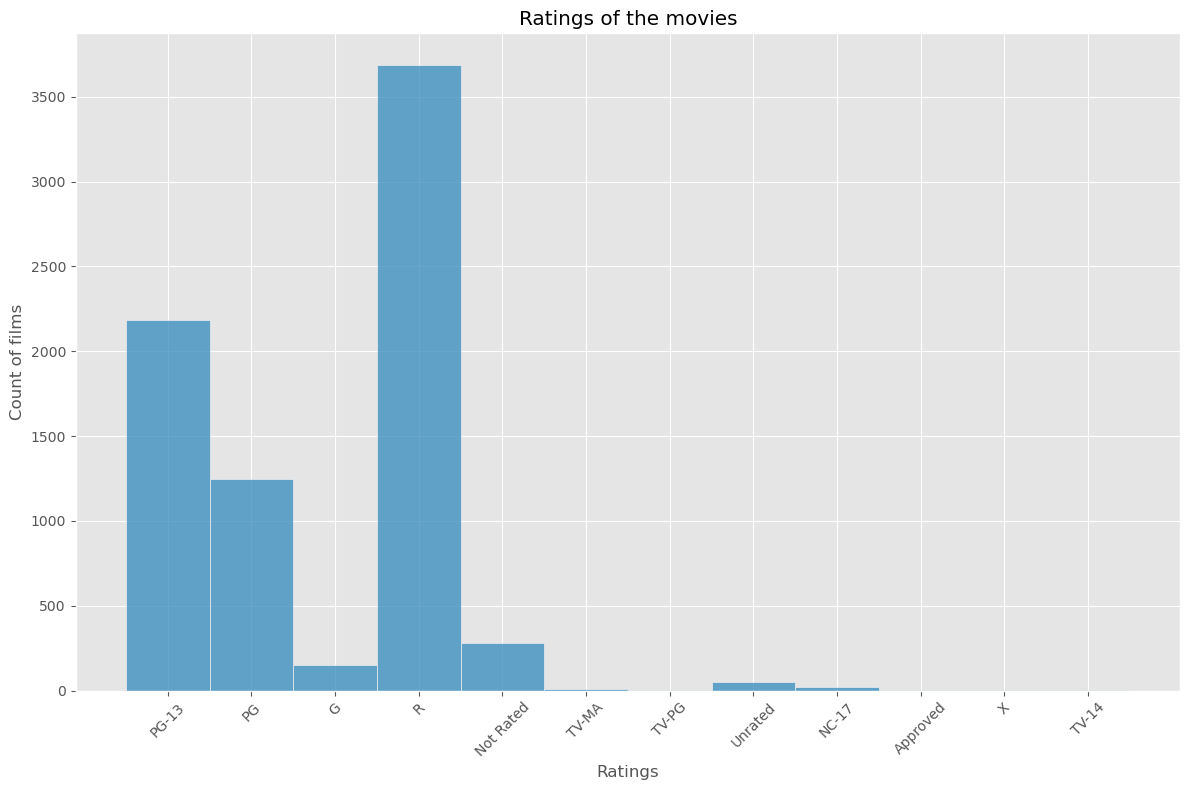

In [29]:
# Histogram to see the ratings of films
ax = sns.histplot(data=df, x="rating", bins=25)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Ratings')
plt.ylabel('Count of films')
plt.title('Ratings of the movies')
plt.tight_layout()
plt.show()

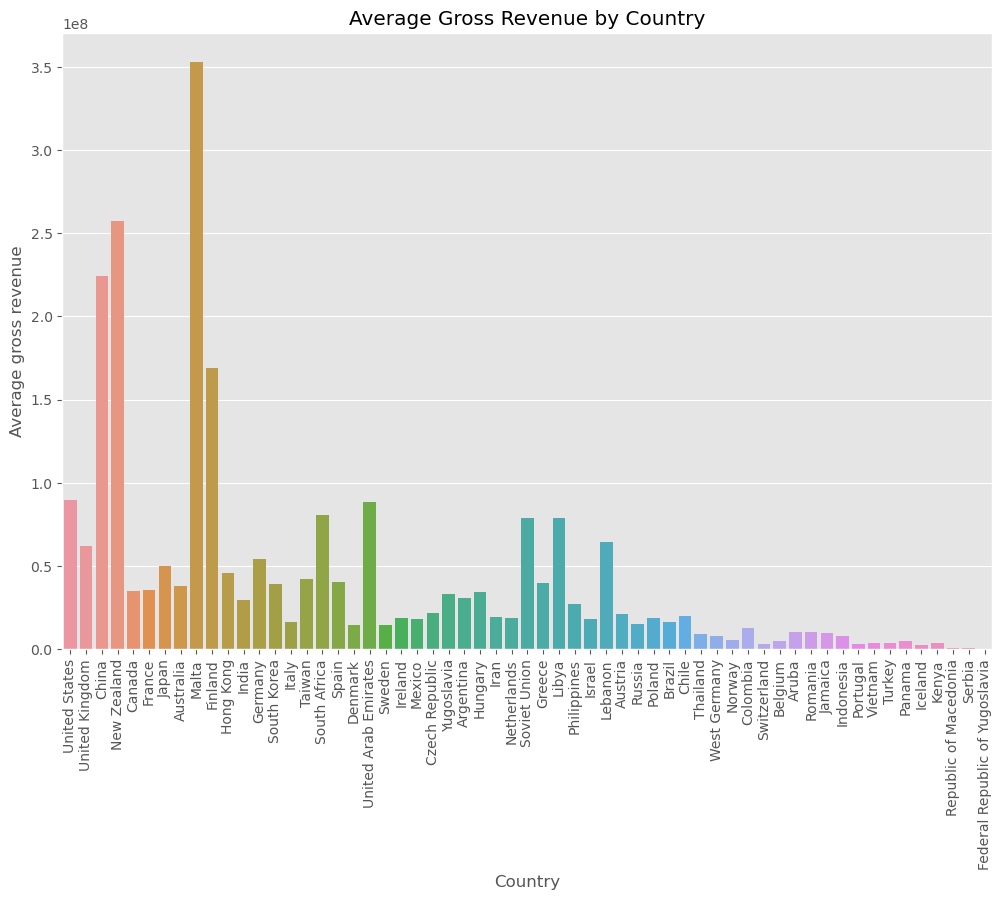

In [30]:
# Barplot of average gross revenue by country
ax = sns.barplot(data=df, x="country", y="gross", ci = None, estimator=np.mean)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average gross revenue")
plt.title("Average Gross Revenue by Country")
plt.show()

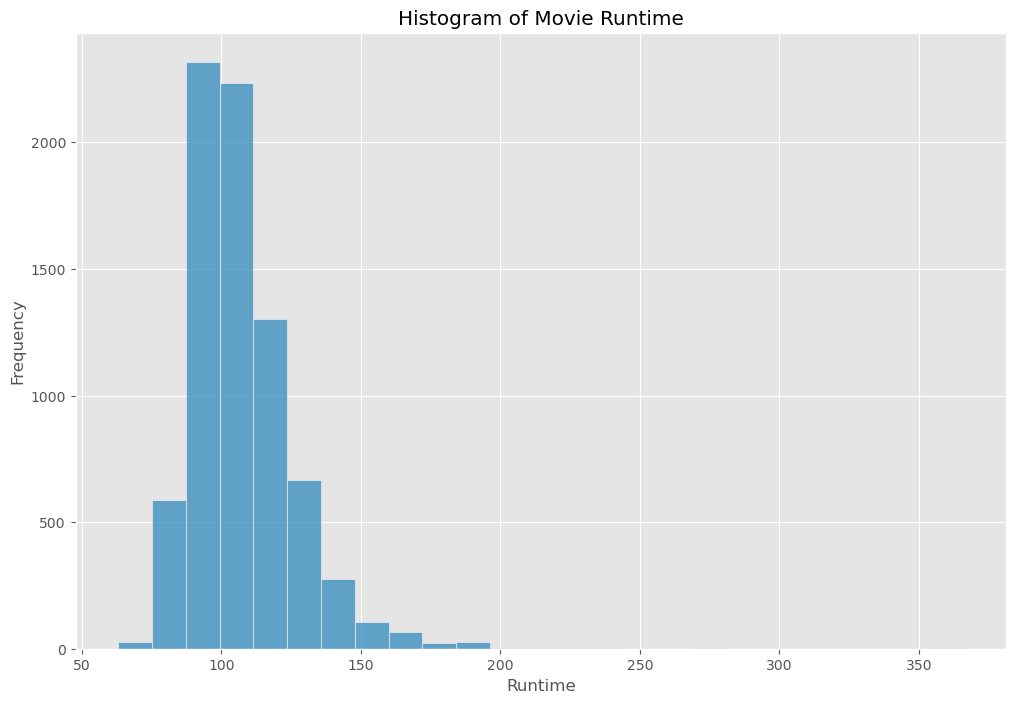

In [31]:
# Runtime of the movies
ax = sns.histplot(data=df, x="runtime", bins=25)

plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.title("Histogram of Movie Runtime")
plt.show()

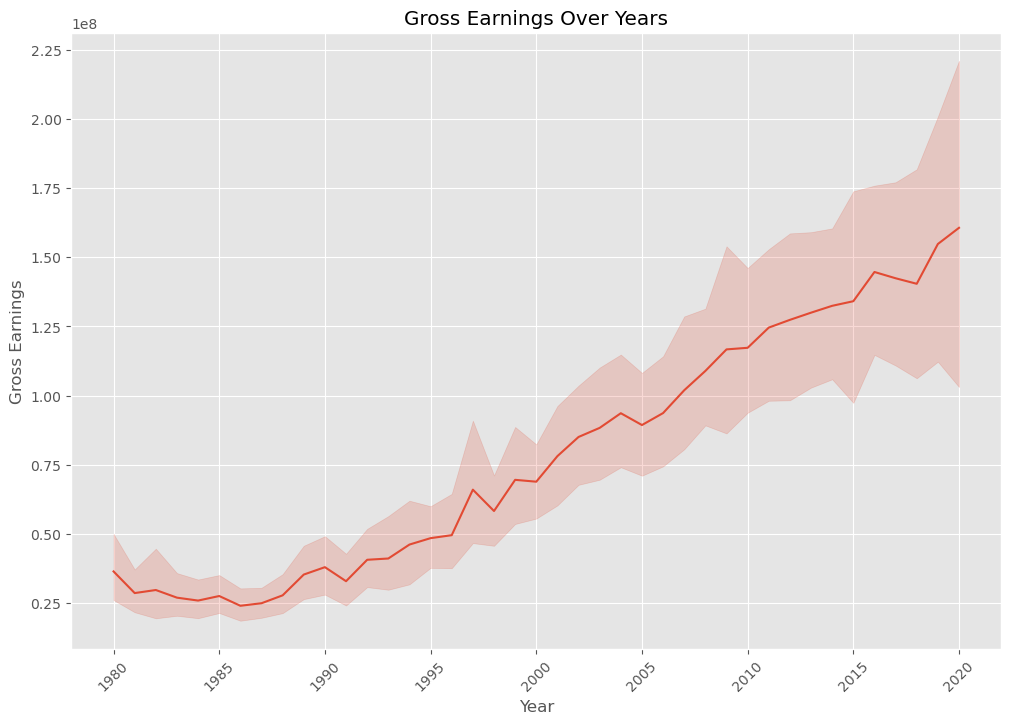

In [32]:
# Gross earnings over years

sns.lineplot(data=df, x="year", y="gross")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Gross Earnings")
plt.title("Gross Earnings Over Years")
plt.show()

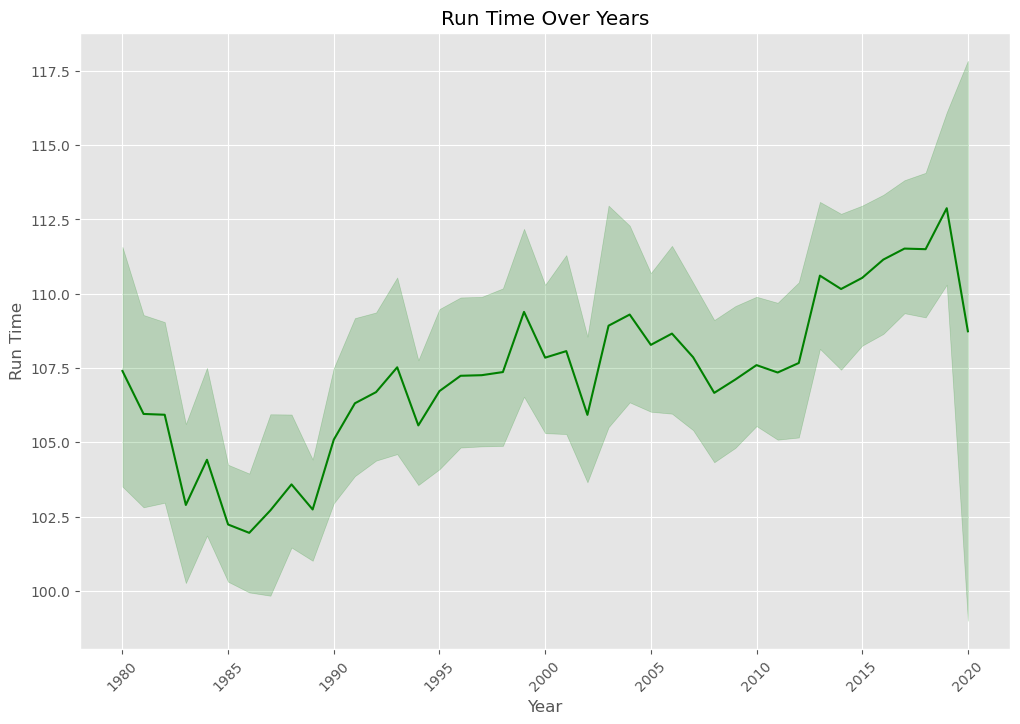

In [33]:
# Movie runtime over years


sns.lineplot(data=df, x="year", y="runtime",color='green')
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Run Time")
plt.title("Run Time Over Years")
plt.show()

In [34]:
# Convert the categorical features into numerical features

df_numerised = df

for col in df_numerised.columns:
    if(df_numerised[col].dtype == 'object'):
        df_numerised[col] = df_numerised[col].astype('category')
        df_numerised[col] = df_numerised[col].cat.codes
        
df_numerised        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_year,release_country
0,532,5,0,2009,694,7.8,1100000,1153,1774,2325,55,237000000,2847246203,2247,162,73,29,56
1,534,5,0,2019,181,8.4,903000,162,739,2232,55,356000000,2797501328,1600,181,19,39,56
2,6875,5,6,1997,702,7.8,1100000,1153,1774,1587,55,200000000,2201647264,2247,194,74,17,56
3,5130,5,0,2015,696,7.8,876000,1123,2541,520,55,245000000,2069521700,1534,138,73,35,56
4,535,5,0,2018,190,8.4,897000,162,739,2232,55,321000000,2048359754,1600,149,20,38,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7640,3350,6,4,2000,1116,6.5,5200,729,1119,2310,54,100000000,1400,474,103,124,21,56
7641,6700,5,4,2019,1146,5.7,320,2535,2556,1907,55,40000000,790,2302,104,128,39,56
7642,4651,3,5,2019,1832,5.2,735,1441,2196,2269,55,63000000,682,1986,93,208,40,56
7643,3396,5,6,1993,84,7.3,5100,33,1714,2553,27,11900000,596,792,134,9,13,28


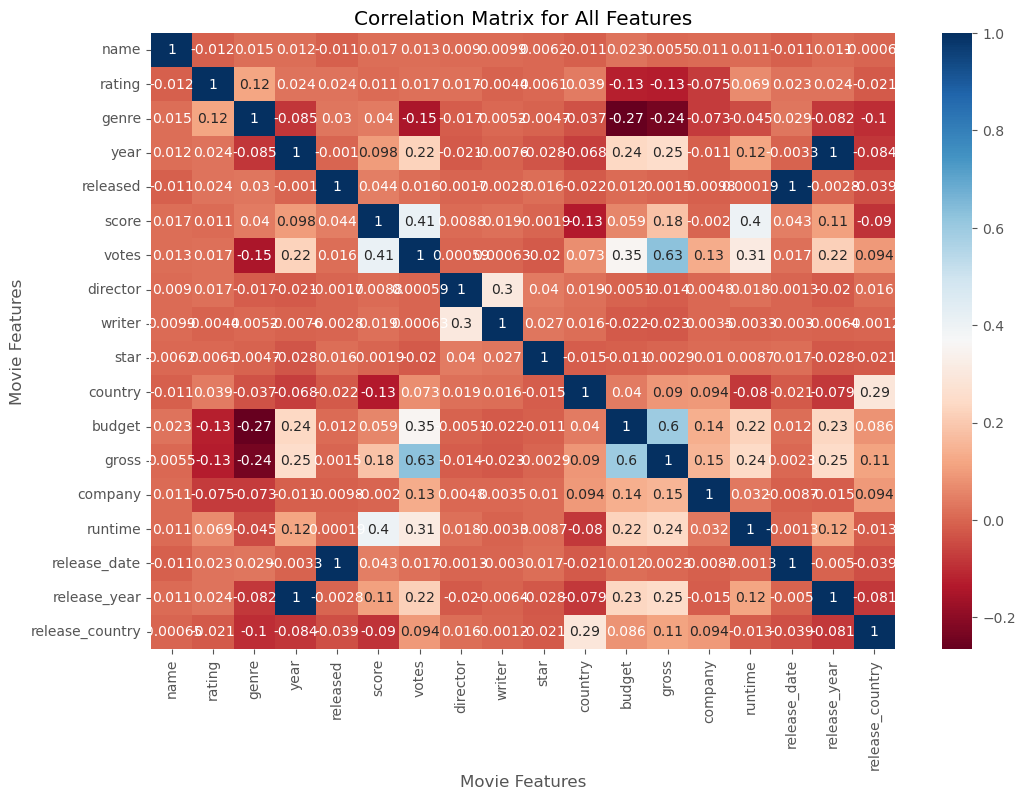

In [35]:
# Visalise the correlation of all features

correlation_matrix = df_numerised.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu')

plt.title('Correlation Matrix for All Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [36]:
# Get the highest correlation pairs of numerised features 
numerised_corr = df_numerised.corr()

num_corr_pairs = numerised_corr.unstack()

high_corr = num_corr_pairs[(num_corr_pairs) > 0.5]

high_corr

name             name               1.000000
rating           rating             1.000000
genre            genre              1.000000
year             year               1.000000
                 release_year       0.996367
released         released           1.000000
                 release_date       0.999713
score            score              1.000000
votes            votes              1.000000
                 gross              0.628735
director         director           1.000000
writer           writer             1.000000
star             star               1.000000
country          country            1.000000
budget           budget             1.000000
                 gross              0.598141
gross            votes              0.628735
                 budget             0.598141
                 gross              1.000000
company          company            1.000000
runtime          runtime            1.000000
release_date     released           0.999713
          